In [0]:
import torch
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

In [0]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

In [97]:
train_data = datasets.CIFAR10(root = 'data', train=True, transform=transform, download=True)
test_data = datasets.CIFAR10(root = 'data', train=False, transform=transform, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
train_dl = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True, num_workers=2, pin_memory=True)
test_dl = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=True, num_workers=2, pin_memory=True)

In [0]:
def imshow(img: torch.Tensor):
    img = img.numpy()
    img = img/2 +0.5
    img = np.transpose(img, (1,2,0))
    plt.imshow(img)

In [0]:
data, target = next(iter(train_dl))

In [80]:
data[:3].shape

torch.Size([3, 3, 32, 32])

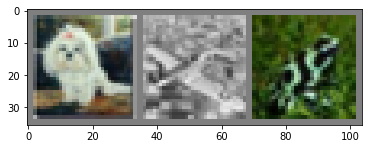

In [81]:
grid = torchvision.utils.make_grid(data[:3])
imshow(grid)

In [0]:
class MyNN(nn.Module):
    def __init__(self):
        super(MyNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 10, 7) # 32/7 + 1 = 6
        self.conv2 = nn.Conv2d(10, 15, 3) #6/3+1 = 3
        
        #3*15 = 45
        self.lin1 = nn.Linear(8640, 200)
        self.lin2 = nn.Linear(200, 10)
    
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)

        x = self.conv2(x)
        x = F.relu(x)

        x = x.view(x.shape[0], -1)

        x = self.lin1(x)
        x = F.relu(x)

        x = self.lin2(x)

        return F.softmax(x)

In [0]:
net = MyNN()

In [84]:
out = net(data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [0]:
criteria = nn.CrossEntropyLoss()

In [0]:
loss = criteria(out,target)

In [0]:
epochs = 100
device = torch.device('cuda')

In [0]:
net = MyNN()
net.to('cuda')
opt = optim.Adam(net.parameters())

In [0]:
for i in range(100):
    print('Epoch number ',i)
    losses = 0
    for X, y in train_dl:
        opt.zero_grad()
        X = X.to(device)
        y = y.to(device)
        out = net(X)
        loss = criteria(out, y)
        losses += loss.item()
        loss.backward()
        opt.step()
    print('Average loss', losses/len(train_dl))
    with torch.no_grad():
        accuracy = 0
        for X, y in test_dl:
            X = X.to(device)
            y = y.to(device)
            out = net(X)
            accuracy += (torch.argmax(out, dim=1) == y).sum().item()
        print('Average Accuracy', accuracy/len(test_dl))

Epoch number  0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Average loss 2.0715034200102473
Average Accuracy 28.987261146496817
Epoch number  1
Average loss 1.991297407070999
Average Accuracy 30.46496815286624
Epoch number  2
Average loss 1.968832848322056
Average Accuracy 30.796178343949045
Epoch number  3
Average loss 1.9457847206184016
Average Accuracy 32.46496815286624
Epoch number  4
Average loss 1.9275856937288933
Average Accuracy 32.503184713375795
Epoch number  5
Average loss 1.9095941350588104
Average Accuracy 32.51592356687898
Epoch number  6
Average loss 1.901494857295395
Average Accuracy 33.146496815286625
Epoch number  7
Average loss 1.8865249432871103
Average Accuracy 33.738853503184714
Epoch number  8
Average loss 1.8752294153813511
Average Accuracy 34.267515923566876
Epoch number  9
Average loss 1.8633662465283327
Average Accuracy 32.904458598726116
Epoch number  10
Average loss 1.8545884997643474
Average Accuracy 33.445859872611464
Epoch number  11
Average loss 1.8428705488629353
Average Accuracy 34.77070063694268
Epoch number 

In [0]:
out.shape

In [0]:
target.shape